In [ ]:
import numpy as np
import random
import os
from PIL import Image
root = "H:/图片/微博_归档/20211009-20211201-unused/"
imgname = "limgae-malenia.jpg"
img_fullname = os.path.join(root, imgname)

arr = np.array(Image.open(img_fullname))
print(arr.shape)
row, col, depth = arr.shape

mask_color = [150,150,150]
# for i in range(3):
#     mask_color[i] = int(np.mean(arr[:,:,i]))
# print(mask_color)

SNR = 4 # Signal/Noise = SNR-1
frame_num = 2
name, ext = os.path.splitext(imgname)

for i in range(frame_num):
    new_arr = np.copy(arr)
    cnt = 0
    for x in range(row):
        for y in range(col):
            if cnt == SNR:
                cnt = 0
            if cnt == 0:
                noise_flag = False
                noise_idx = random.randint(0,SNR-1)
            noise_flag = (cnt == noise_idx)
            new_arr[x,y] = arr[x,y] if not noise_flag else mask_color
            cnt += 1
    im = Image.fromarray(np.uint8(new_arr))

    new_img_fullname = os.path.join(root, f"{name}-x{SNR}-{i}{ext}")
    print(f">>> Saving {new_img_fullname} ...")
    display(im)
    im.save(new_img_fullname)


In [ ]:
import numpy as np
import random
import os
from PIL import Image
root = "H:/图片/微博_归档/20211009-20211201-unused/"
# imgname = "limgae-malenia.jpg"
imgname = "wickellia-tifa-cloud-fuck.jpg"
# imgname = "liangxing-tifa-umbrella-2.jpeg"
img_fullname = os.path.join(root, imgname)
name, ext = os.path.splitext(imgname)

arr = np.array(Image.open(img_fullname))
print(arr.shape)
row, col, depth = arr.shape

# shift_pix = (100,100)

for dep in [0,1,2]:
    new_arr = np.zeros(arr.shape,dtype=np.uint8)
    new_arr[:,:,dep] = arr[:,:,dep]
    im = Image.fromarray(np.uint8(new_arr))
    new_img_fullname = os.path.join(root, f"{name}-rgb-{dep}{ext}")
    print(f">>> Saving {new_img_fullname} ...")
    display(im)
    im.save(new_img_fullname)

(3900, 6500)
(720, 1200)
>>> Saving H:/图片/微博_归档/20211009-20211201-unused/wickellia-tifa-cloud-fuck-grid-8-1.jpg ...


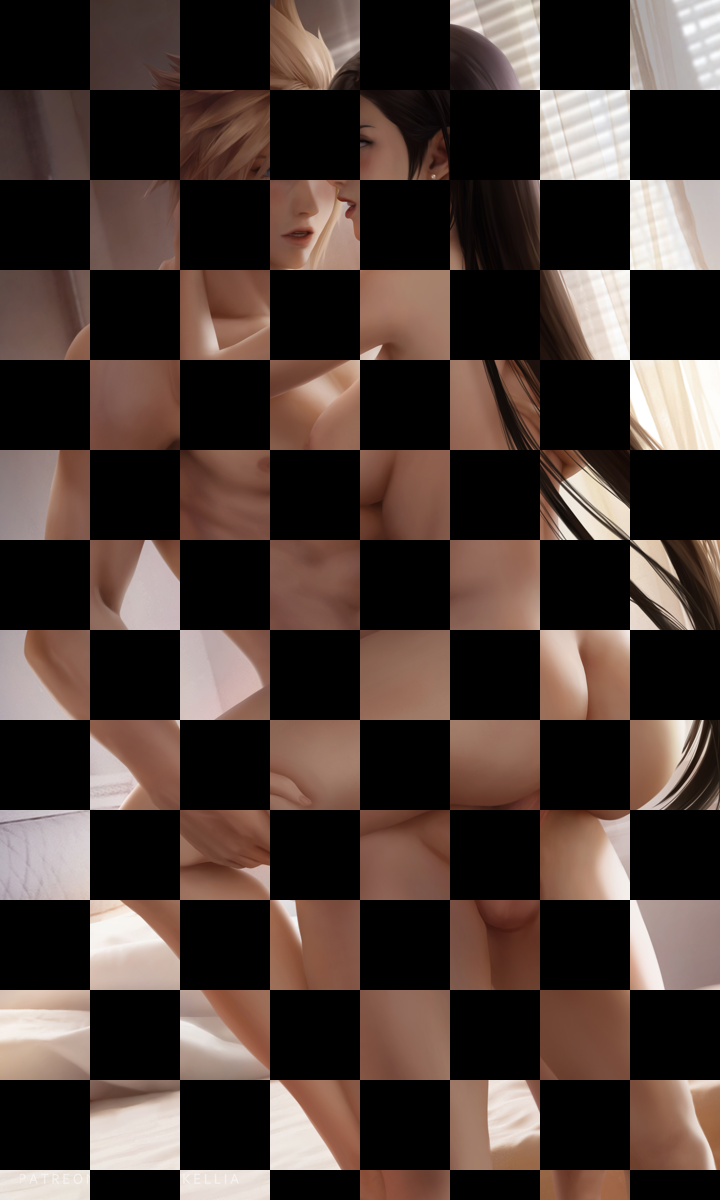

>>> Saving H:/图片/微博_归档/20211009-20211201-unused/wickellia-tifa-cloud-fuck-grid-8-2.jpg ...


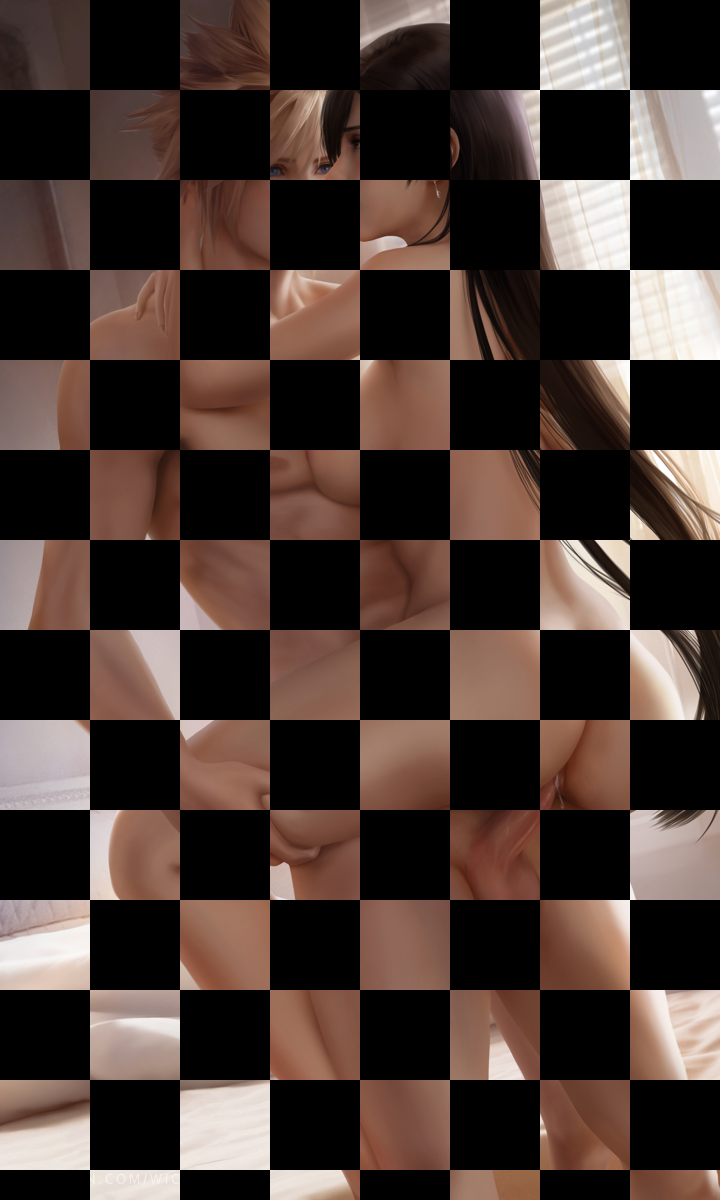

In [63]:
import numpy as np
import random
import os
from PIL import Image
root = "H:/图片/微博_归档/20211009-20211201-unused/"
# imgname = "liangxing-tifa-umbrella-2.jpeg"
imgname = "wickellia-tifa-cloud-fuck.jpg"
img_fullname = os.path.join(root, imgname)
name, ext = os.path.splitext(imgname)

img = Image.open(img_fullname)

max_w, max_h = 1200, 1200

w, h = img.size
new_w, new_h = w, h
print(img.size)

w_ratio, h_ratio = w/max_w, h/max_h
ratio = max(w_ratio, h_ratio, 1)
new_w, new_h = int(w/ratio), int(h/ratio)

imgr = img.resize((new_w, new_h))
print(imgr.size)
img.close()

arr = np.array(imgr)
row, col, depth = arr.shape

grid_line_num = 8
grid_pixel_num = int(min(new_w,new_h)/grid_line_num)

# * image - Convert RGBA color to RGB - Stack Overflow
#   * https://stackoverflow.com/questions/2049230/convert-rgba-color-to-rgb

for cnt in [1,2]:
    new_arr = np.copy(arr)
    if cnt == 1:
        for i in range(0, new_h, 2*grid_pixel_num):
            for j in range(0, new_w, 2*grid_pixel_num):
                TL_grid = (new_arr[i:i+grid_pixel_num,j:j+grid_pixel_num,:]).view()
                grid_size = np.shape(TL_grid)
                TL_grid[:] = np.zeros(grid_size, np.uint8)

                BR_grid = (new_arr[i+grid_pixel_num:i+2*grid_pixel_num,j+grid_pixel_num:j+2*grid_pixel_num,:]).view()
                grid_size = np.shape(BR_grid)
                BR_grid[:] = np.zeros(grid_size, np.uint8)
    if cnt == 2:
        for i in range(0, new_h, 2*grid_pixel_num):
            for j in range(0, new_w, 2*grid_pixel_num):
                TR_grid = (new_arr[i:i+grid_pixel_num,j+grid_pixel_num:j+2*grid_pixel_num,:]).view()
                grid_size = np.shape(TR_grid)
                TR_grid[:] = np.zeros(grid_size, np.uint8)
                
                BL_grid = (new_arr[i+grid_pixel_num:i+2*grid_pixel_num,j:j+grid_pixel_num,:]).view()
                grid_size = np.shape(BL_grid)
                BL_grid[:] = np.zeros(grid_size, np.uint8)

    new_img = Image.fromarray(np.uint8(new_arr))
    new_img_fullname = os.path.join(root, f"{name}-grid-{grid_line_num}-{cnt}{ext}")
    print(f">>> Saving {new_img_fullname} ...")
    display(new_img)
    new_img.save(new_img_fullname)